In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar datos
dataframe = pd.read_csv('Pediccion accidente cerebrovascular.csv', sep=';')
clasificadores = ['NO', 'SI']

In [41]:
dataframe.head(10)

,Genero,Edad,hipertensión,cardiopatía,Alguna vez casada,Tipo_de_trabajo,Tipo de residencia,nivel promedio de glucosa,IMC,Estado de fumador,Ataque
0,1,67,2,1,1,1,1,229,37,1,1
1,1,82,2,1,1,1,2,126,33,2,1
2,2,49,2,2,1,1,1,171,34,3,1
3,2,79,1,2,1,2,2,174,24,2,1
4,1,81,2,2,1,1,1,186,29,1,1
5,1,74,1,1,1,1,2,72,27,2,1
6,2,69,2,2,2,1,1,94,23,2,1
7,2,81,1,2,1,1,2,82,32,2,1
8,2,61,2,1,1,3,2,122,37,3,1
9,2,54,2,2,1,1,1,125,27,3,1


In [21]:
dataframe.describe()

,Genero,Edad,hipertensión,cardiopatía,Alguna vez casada,Tipo_de_trabajo,Tipo de residencia,nivel promedio de glucosa,IMC,Estado de fumador,Ataque
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,1.609051,48.863358,1.880876,1.939854,1.241168,1.559708,1.490511,111.068905,30.539562,1.971095,1.947445
std,0.488034,18.871987,0.323982,0.237792,0.427854,0.845556,0.499983,49.044997,7.351825,0.677177,0.223175
min,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,12.000000,1.000000,1.000000
25%,1.000000,34.000000,2.000000,2.000000,1.000000,1.000000,1.000000,77.000000,25.000000,2.000000,2.000000
50%,2.000000,51.000000,2.000000,2.000000,1.000000,1.000000,1.000000,92.000000,29.000000,2.000000,2.000000
75%,2.000000,63.000000,2.000000,2.000000,1.000000,2.000000,2.000000,125.000000,34.000000,2.000000,2.000000
max,2.000000,82.000000,2.000000,2.000000,2.000000,5.000000,2.000000,272.000000,92.000000,3.000000,2.000000


In [23]:
dataframe.groupby('Ataque').size()

Ataque
1     180
2    3245
dtype: int64

In [25]:
y = dataframe['Ataque']
x = dataframe.drop('Ataque', axis=1)

C:\Users\salva\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


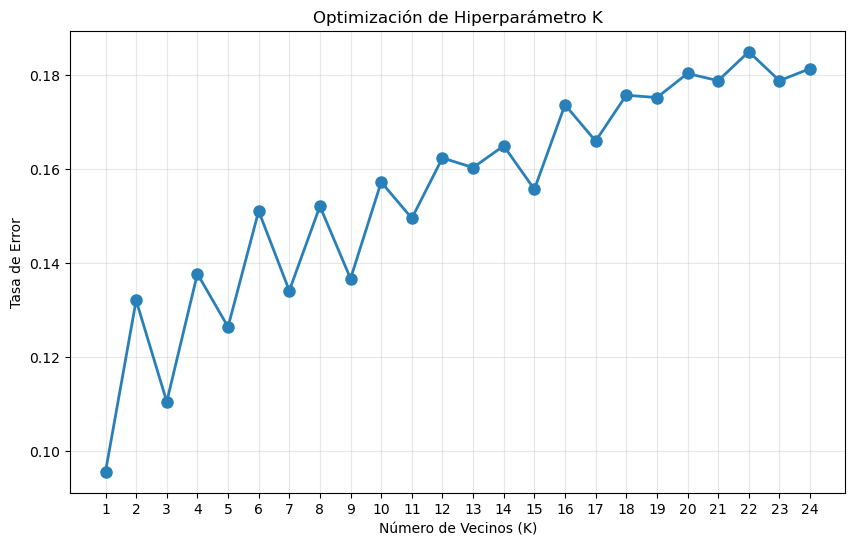

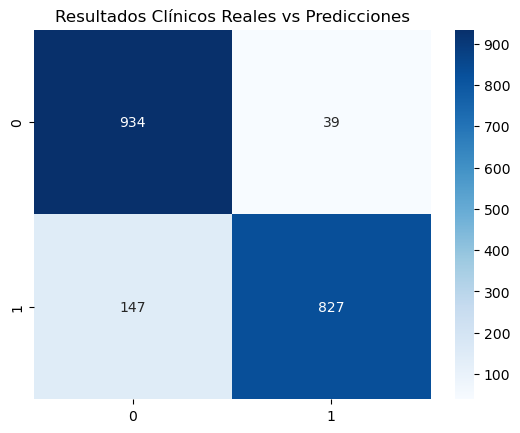

              precision    recall  f1-score   support

   No Ataque       0.86      0.96      0.91       973
      Ataque       0.95      0.85      0.90       974

    accuracy                           0.90      1947
   macro avg       0.91      0.90      0.90      1947
weighted avg       0.91      0.90      0.90      1947


Evaluación de Riesgo: BAJO
Probabilidad: 0.0%
Acción: Seguimiento rutinario

Evaluación de Riesgo para el nuevo paciente: ALTO
Probabilidad: 100.0%
Acción: Intervención inmediata


C:\Users\salva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\salva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:

# Parámetros
PARAMS = {
    'test_size': 0.3,
    'random_state': 30,
    'rango_k': range(1, 25),
    'umbrales_riesgo': [0.4, 0.7]
}

def cargar_datos(ruta_archivo):
    dataframe = pd.read_csv(ruta_archivo, sep=';')
    X = dataframe.drop('Ataque', axis=1)
    y = dataframe['Ataque']
    return X, y

def preparar_datos(X, y):
    # Balanceo con SMOTE
    smote = SMOTE(random_state=PARAMS['random_state'])
    X_bal, y_bal = smote.fit_resample(X, y)
    
    # División estratificada
    return train_test_split(
        X_bal, y_bal,
        test_size=PARAMS['test_size'],
        random_state=PARAMS['random_state'],
        stratify=y_bal
    )

def optimizar_knn(X_train, X_test, y_train, y_test):
    tasa_error = []
    
    for k in PARAMS['rango_k']:
        modelo = KNeighborsClassifier(n_neighbors=k)
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)
        tasa_error.append(np.mean(pred != y_test))
    
    # Visualización de error
    plt.figure(figsize=(10, 6))
    plt.plot(PARAMS['rango_k'], tasa_error, 
             marker='o', markersize=8,
             color='#2980b9', linewidth=2)
    plt.xticks(PARAMS['rango_k'])
    plt.title('Optimización de Hiperparámetro K')
    plt.xlabel('Número de Vecinos (K)')
    plt.ylabel('Tasa de Error')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

def evaluar_modelo(modelo, X_test, y_test):
    # Matriz de confusión
    cm = confusion_matrix(y_test, modelo.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Resultados Clínicos Reales vs Predicciones')
    plt.show()
    
    # Reporte de clasificación
    print(classification_report(y_test, modelo.predict(X_test),
                                target_names=['No Ataque', 'Ataque']))

# Sistema de predicción
class PredictorACV:
    def __init__(self, modelo):
        self.modelo = modelo
        self.riesgos = [
            (0.4, 'BAJO', 'Seguimiento rutinario'),
            (0.7, 'MODERADO', 'Monitoreo intensivo'),
            (1.0, 'ALTO', 'Intervención inmediata')
        ]
    
    def predecir_riesgo(self, datos_paciente):
        proba = self.modelo.predict_proba([datos_paciente])[0][1]
        
        for umbral, nivel, accion in self.riesgos:
            if proba <= umbral:
                return {
                    'nivel': nivel,
                    'probabilidad': round(proba * 100, 2),
                    'accion_recomendada': accion
                }

# ======================
# EJECUCIÓN PRINCIPAL
# ======================
if __name__ == "__main__":
    # Flujo completo
    X, y = cargar_datos('Pediccion accidente cerebrovascular.csv')
    X_train, X_test, y_train, y_test = preparar_datos(X, y)
    modelo_optimo = optimizar_knn(X_train, X_test, y_train, y_test)
    evaluar_modelo(modelo_optimo, X_test, y_test)
    
    # Sistema predictivo
    predictor = PredictorACV(modelo_optimo)
    
    # Datos del paciente a evaluar
    #paciente_ejemplo = [2, 68, 1, 0, 1, 2, 1, 185, 85.4, 3]  # Modifica según los datos que necesites
    paciente_ejemplo = [1, 81, 2, 2, 1, 1, 1, 186, 29, 1]
    resultado = predictor.predecir_riesgo(paciente_ejemplo)
    
    # Salida clínica
    print(f"\nEvaluación de Riesgo: {resultado['nivel']}")
    print(f"Probabilidad: {resultado['probabilidad']}%")
    print(f"Acción: {resultado['accion_recomendada']}")
    
    # Predicción directa para un nuevo paciente
    nuevo_paciente = [1, 56, 0, 1, 0, 1, 1, 180, 75.0, 2]  # Cambia estos valores según el nuevo paciente
    resultado_nuevo = predictor.predecir_riesgo(nuevo_paciente)
    
    print(f"\nEvaluación de Riesgo para el nuevo paciente: {resultado_nuevo['nivel']}")
    print(f"Probabilidad: {resultado_nuevo['probabilidad']}%")
    print(f"Acción: {resultado_nuevo['accion_recomendada']}")

    

In [28]:
import pickle

with open("modelo_knn_acv.pkl", "wb") as f:
    pickle.dump(modelo_optimo, f)

with open("columnas_modelo.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)